In [10]:
# define input x and output y
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [4]:
# convert input lists to tensors
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
X.shape, Y.shape

(torch.Size([4, 2]), torch.Size([4, 1]))

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
X = X.to(device)
Y = Y.to(device)

In [17]:
from torch import nn
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Linear(2,8)
    self.hidden_layer_activation = nn.ReLU()
    self.hidden_to_output_layer = nn.Linear(8,1)
  def forward(self, x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    return x

In [18]:
mynet = MyNeuralNet().to(device)

In [19]:
#obtain the parameters of a given layer
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.6130,  0.4413],
        [ 0.5569,  0.1600],
        [-0.1117, -0.5902],
        [ 0.6861,  0.6717],
        [ 0.2493,  0.4937],
        [-0.2465, -0.1467],
        [-0.2973,  0.3563],
        [-0.1268,  0.0588]], requires_grad=True)

In [20]:
# obtaining parameters of the neural network
for par in mynet.parameters():
  print(par)

Parameter containing:
tensor([[-0.6130,  0.4413],
        [ 0.5569,  0.1600],
        [-0.1117, -0.5902],
        [ 0.6861,  0.6717],
        [ 0.2493,  0.4937],
        [-0.2465, -0.1467],
        [-0.2973,  0.3563],
        [-0.1268,  0.0588]], requires_grad=True)
Parameter containing:
tensor([-0.3864, -0.0245, -0.1186,  0.3682,  0.3732,  0.5742, -0.1459, -0.1617],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0909,  0.0485, -0.2022,  0.1946, -0.0647,  0.2110, -0.0277, -0.0506]],
       requires_grad=True)
Parameter containing:
tensor([0.0068], requires_grad=True)


In [21]:
# define loss function
loss_fn = nn.MSELoss()

In [25]:
pred = mynet(X)
# when computing loss, we always send the predictions first then the ground truth
loss = loss_fn(pred, Y)
print(loss)

tensor(76.9252, grad_fn=<MseLossBackward0>)


In [26]:
#define the optimizer
optimizer = torch.optim.SGD(mynet.parameters(), lr=0.001)

In [27]:
# perform weight update for 50 epochs
loss_values = []
for _ in range(50):
  # flush the previous epoch's gradients
  optimizer.zero_grad()
  # make a prediction
  pred = mynet(X)
  # calculate the loss
  loss = loss_fn(pred, Y)
  #perform backpropagation
  loss.backward()
  # updae the weightd according to the gradients computed
  optimizer.step()
  # append loss values
  loss_values.append(loss.item())

In [28]:
loss_values

[76.92520904541016,
 53.09996795654297,
 35.462364196777344,
 22.58234405517578,
 13.620421409606934,
 7.7796406745910645,
 4.230350494384766,
 2.2114992141723633,
 1.1270935535430908,
 0.5710745453834534,
 0.29601067304611206,
 0.1634901762008667,
 0.10083285719156265,
 0.07157844305038452,
 0.05802014842629433,
 0.051748186349868774,
 0.048830799758434296,
 0.047448717057704926,
 0.04676737263798714,
 0.04640448838472366,
 0.04618632420897484,
 0.046033985912799835,
 0.04591168090701103,
 0.04580280929803848,
 0.04570038989186287,
 0.045601002871990204,
 0.04550301283597946,
 0.045405663549900055,
 0.045308779925107956,
 0.04521240293979645,
 0.04511627182364464,
 0.045020125806331635,
 0.04492437094449997,
 0.04482868313789368,
 0.04473342001438141,
 0.04463813453912735,
 0.044543273746967316,
 0.044448573142290115,
 0.044353973120450974,
 0.04425949230790138,
 0.044165391474962234,
 0.04407135397195816,
 0.04397756606340408,
 0.043884120881557465,
 0.04379073530435562,
 0.043697487

Text(0, 0.5, 'loss value')

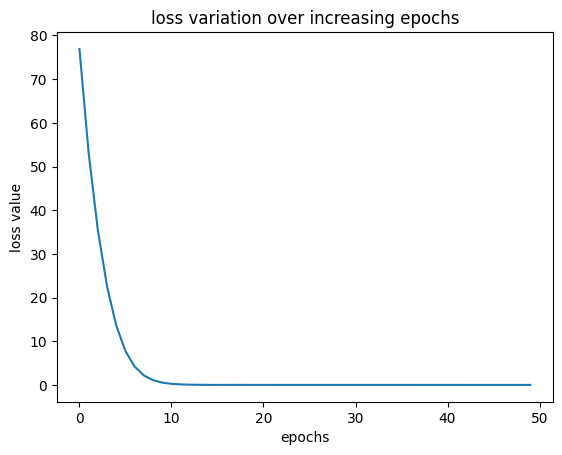

In [30]:
# plot the variation in loss over increasing epochs
import matplotlib.pyplot as plt
plt.plot(loss_values)
plt.title("loss variation over increasing epochs")
plt.xlabel("epochs")
plt.ylabel("loss value")